# The purpose of this exercise is to see how accurate of a Neural Network we can create to classify X-Ray scans from patients with pneumonia. 

# Let's start by Importing the required libraries

In [6]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir())

# Keras Libraries
import pickle

import keras
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import  load_img
from sklearn.metrics import classification_report, confusion_matrix

['.git', '.gitignore', '.ipynb_checkpoints', 'app.py', 'applying-some-fastai-techniques-to-get-90-acc.ipynb', 'chest_xray', 'Dockerfile', 'keras_model.h5', 'LICENSE', 'Procfile', 'requirements.txt', 'static', 'templates', 'using-keras-to-predict-pneumonia-cnn.ipynb', 'X-ray-images-main.zip']


# Our data is located in three folders:

1. train= contains the training data/images for teaching our model.
2. val= contains images which we will use to validate our model. The purpose of this data set is to prevent our model from Overfitting. Overfitting is when your model gets a little too comofortable with the training data and can't handle data it hasn't see....too well.
3. test = this contains the data that we use to test the model once it has learned the relationships between the images and their label (Pneumonia/Not-Pneumonia)

In [7]:
mainDIR = os.listdir('D:\\Desktop\\Projects\\Pneumonia\\chest_xray')
print(mainDIR)

['.DS_Store', 'test', 'train', 'val']


In [8]:
train_folder = 'D:\\Desktop\\Projects\\Pneumonia\\chest_xray\\train'
test_folder = 'D:\\Desktop\\Projects\\Pneumonia\\chest_xray\\test'
val_folder = 'D:\\Desktop\\Projects\\Pneumonia\\chest_xray\\val'

# Let's set up the training and testing folders.

In [9]:
# train 
os.listdir(train_folder)
train_n = train_folder+'/NORMAL/'
train_p = train_folder+'/PNEUMONIA/'

# Let's take a look at some of the pictures.

1342
normal picture title:  IM-0718-0001.jpeg
pneumonia picture title: person1292_virus_2218.jpeg


Text(0.5, 1.0, 'Pneumonia')

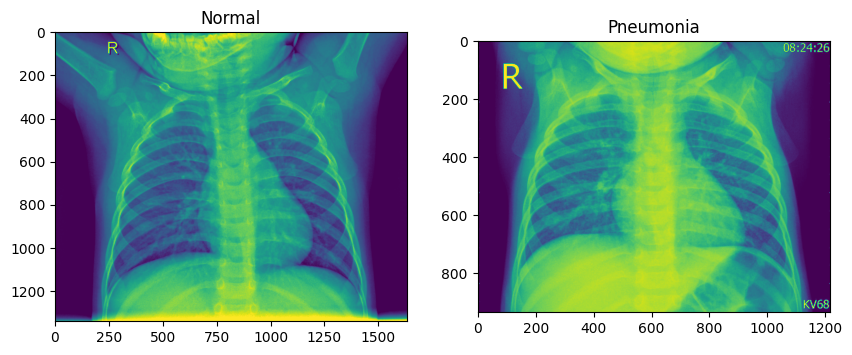

In [10]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Convolutional Neural Networks are easy to build and run because of the deep learning libraries such as Keras

* Keras is a high level deep learning library.
* It runs on top of more low level libraries such as Tensorflow which is why you will usually see that message. 'Using TensorFlow backend.' display when you call Keras.
* I am going to build a CNN that has 2 Convolution layers. After each convolution, I will add a Pooling layer using max-pooling.
* After the second convolutional layer, we will add 2 Fully Connected layers which will take out feature map of an image and make predictions about it. The second FC
* has only 1 unit becuase it needs to predict if someone has pneumonia.
* When we compile this CNN, we will use the Adam optimization fuction which optimizes how fast our model learns the correct classification of the image. Optimization functions are far too complex for me to get into in this post.

In [11]:
# let's build the CNN model

cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="tanh", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="tanh"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32,(3,3),activation = "tanh"))
cnn.add(MaxPooling2D(pool_size = (2, 2)))

cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 64))

cnn.add(Dense(activation = 'sigmoid', units = 1))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Now, we are going to fit the model to our training dataset and we will keep out testing dataset seperate

In [12]:
num_of_test_samples = 600
batch_size = 32

In [13]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator( rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('D:\\Desktop\\Projects\\Pneumonia\\chest_xray/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('D:\\Desktop\\Projects\\Pneumonia\\chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('D:\\Desktop\\Projects\\Pneumonia\\chest_xray/test/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# This summary is a great way for us to see how our CNN is being set up

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [15]:
cnn_model = cnn.fit(training_set,
                         steps_per_epoch = 50,
                         epochs = 10,
                         validation_data = validation_generator,
                         validation_steps = 20,
                         verbose = 1)

Epoch 1/10
50/50 [==============================] - 139s 3s/step - loss: 0.5677 - accuracy: 0.7169 - val_loss: 0.6482 - val_accuracy: 0.6250
Epoch 2/10
50/50 [==============================] - 110s 2s/step - loss: 0.3862 - accuracy: 0.8250
Epoch 3/10
50/50 [==============================] - 140s 3s/step - loss: 0.3351 - accuracy: 0.8506
Epoch 4/10
50/50 [==============================] - 131s 3s/step - loss: 0.3389 - accuracy: 0.8481
Epoch 5/10
50/50 [==============================] - 120s 2s/step - loss: 0.3003 - accuracy: 0.8769
Epoch 6/10
50/50 [==============================] - 117s 2s/step - loss: 0.2813 - accuracy: 0.8806
Epoch 7/10
50/50 [==============================] - 110s 2s/step - loss: 0.2471 - accuracy: 0.8988
Epoch 8/10
50/50 [==============================] - 106s 2s/step - loss: 0.2447 - accuracy: 0.8988
Epoch 9/10
50/50 [==============================] - 106s 2s/step - loss: 0.2471 - accuracy: 0.8950
Epoch 10/10
50/50 [==============================] - 101s 2s/step -

In [16]:
test_accu = cnn.evaluate(test_set,steps=624)

624/624 [==============================] - 57s 90ms/step - loss: 0.2928 - accuracy: 0.8846


In [17]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 88.46153616905212 %


In [20]:
pickle.dump(cnn, open('keras_model.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    

In [32]:
cnn.save("keras_model.h5")

In [21]:
model = pickle.load(open('keras_model.pkl', 'rb'))
Y_pred = model.predict(test_set, 100)
y_pred = np.argmax(Y_pred, axis=1)
# confusion_matrix(validation_generator.classes, y_pred)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2022-12-09 15:15:30         3833
metadata.json                                  2022-12-09 15:15:30           64
variables.h5                                   2022-12-09 15:15:30      1157680
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........1

In [22]:
max(y_pred)

0

# Now, let's see how accuracy changed over our training and Validation Set and also how our Loss function changed!!

20/20 - 8s - loss: 0.2779 - accuracy: 0.8894 - 8s/epoch - 407ms/step


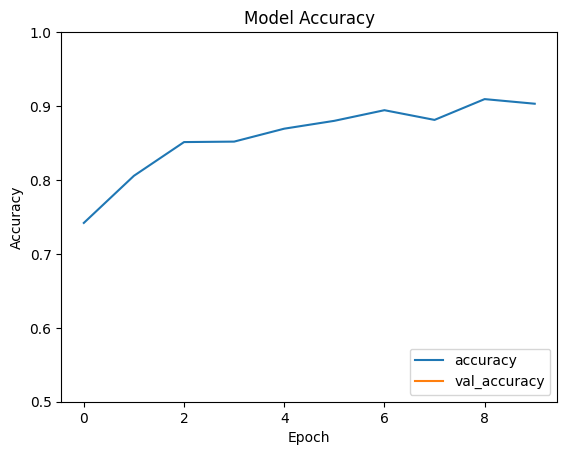

In [45]:
plt.plot(cnn_model.history['accuracy'], label='accuracy')
plt.plot(cnn_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(test_set,  verbose=2)

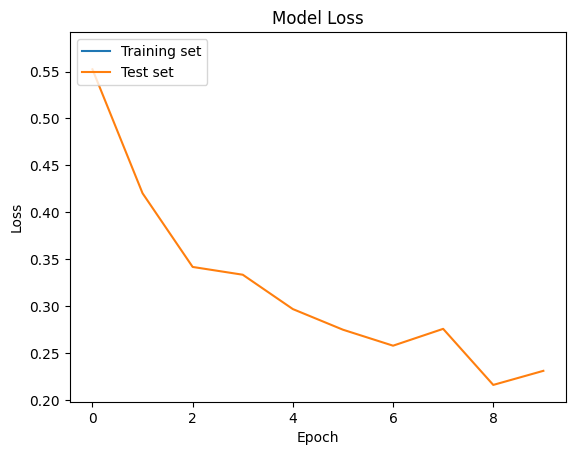

In [46]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

The world of medical imaging is ripe for a revolution in terms of deploying CNN based technologies. These are two things that AI technologies are great at. I will be working with some more bio-medical imaging dataset just to get more practice and probably create some web applications online for atleast one of them!!

# Thanks and Please Review The code and Give Valuable Feedback or Suggestions
-Viplove Thakran